# Covid in Italia
  

# 1. Dati relativi alla regione Liguria e alla provincia di Imperia
I dati relativi alla provincia sono veramente pochi, forse non ho trovato il dataset giusto

In [1]:
import os
import pandas as pd

In [2]:
# print(os.listdir())
df_province = pd.read_csv(
    "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")
df_regioni = pd.read_csv(
    "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv")




In [3]:
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 200)

df_regioni.tail()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
27988,2023-10-18T17:00:00,ITA,19,Sicilia,38.115697,13.362357,156,8,164,3681,3845,28,29,1815970,12904,NaN,NaN,1832719,16943464,11279942.0,NaN,1.0,NaN,NaN,541553.0,1291166.0,5478807.0,11464657.0,ITG,ITG1
27989,2023-10-18T17:00:00,ITA,9,Toscana,43.769231,11.255889,289,9,298,3669,3967,3,295,1610250,12098,NaN,NaN,1626315,17071162,5444890.0,NaN,0.0,NaN,NaN,723298.0,903017.0,7118333.0,9952829.0,ITI,ITI1
27990,2023-10-18T17:00:00,ITA,10,Umbria,43.106758,12.388247,99,3,102,1691,1793,-80,92,445962,2509,NaN,NaN,450264,5120156,822412.0,- Si fa presente che 0 dei ricoveri non UTI ap...,0.0,NaN,NaN,160120.0,290144.0,1760829.0,3359327.0,ITI,ITI2
27991,2023-10-18T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,20,0,20,221,241,13,22,50812,578,NaN,NaN,51631,599291,147581.0,NaN,0.0,NaN,NaN,16327.0,35304.0,146183.0,453108.0,ITC,ITC2
27992,2023-10-18T17:00:00,ITA,5,Veneto,45.434905,12.338452,334,12,346,7615,7961,23,649,2743640,17016,NaN,NaN,2768617,38574084,5388160.0,NaN,1.0,NaN,NaN,1103048.0,1665569.0,11957499.0,26616585.0,ITH,ITH3


Il DataFrame viene creato con una copy per evitare il setting with copy warnig

In [4]:
df_liguria = df_regioni.loc[df_regioni.loc[:,"codice_regione"]==7].copy().reset_index()
df_liguria["tamponi_effettuati"] = df_liguria["tamponi"]-df_liguria["tamponi"].shift(1)
df_liguria["tamponi_effettuati_mol"] = df_liguria["tamponi_test_molecolare"]-df_liguria["tamponi_test_molecolare"].shift(1)
# print(df_liguria.loc[:,"nuovi_positivi"])
df_liguria["perc_positivi_tot"] = df_liguria["nuovi_positivi"]/df_liguria["tamponi_effettuati"]*100
df_liguria["perc_positivi_mol"] = df_liguria["nuovi_positivi"]/df_liguria["tamponi_effettuati_mol"]*100

filt = df_liguria["data"] >= "2021-12-01T00:00:00"
df_liguria = df_liguria.loc[filt]
# print (df_liguria.columns)
df_liguria.tail()

,index,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2,tamponi_effettuati,tamponi_effettuati_mol,perc_positivi_tot,perc_positivi_mol
1328,27895,2023-10-14T17:00:00,ITA,7,Liguria,44.411493,8.932699,151,6,157,0,157,-1,129,670308,5964,NaN,NaN,676429,7047068,1535186.0,NaN,1.0,NaN,*di cui 55470 reinfezioni a partire dal 3/09/...,288061.0,388368.0,2708514.0,4338554.0,ITC,ITC3,654.0,39.0,19.724771,330.769231
1329,27916,2023-10-15T17:00:00,ITA,7,Liguria,44.411493,8.932699,147,5,152,0,152,-5,75,670388,5964,NaN,NaN,676504,7047559,1535255.0,NaN,0.0,NaN,*di cui 55495 reinfezioni a partire dal 3/09/...,288076.0,388428.0,2708529.0,4339030.0,ITC,ITC3,491.0,15.0,15.274949,500.000000
1330,27937,2023-10-16T17:00:00,ITA,7,Liguria,44.411493,8.932699,145,4,149,0,149,-3,22,670413,5964,NaN,NaN,676526,7047769,1535282.0,NaN,1.0,NaN,*di cui 55506 reinfezioni a partire dal 3/09/...,288082.0,388444.0,2708535.0,4339234.0,ITC,ITC3,210.0,6.0,10.476190,366.666667
1331,27958,2023-10-17T17:00:00,ITA,7,Liguria,44.411493,8.932699,136,4,140,0,140,-9,166,670579,5973,NaN,NaN,676692,7048763,1535402.0,NaN,0.0,NaN,*di cui 55573 reinfezioni a partire dal 3/09/...,288118.0,388574.0,2708571.0,4340192.0,ITC,ITC3,994.0,36.0,16.700201,461.111111
1332,27979,2023-10-18T17:00:00,ITA,7,Liguria,44.411493,8.932699,135,4,139,0,139,-1,93,670673,5973,NaN,NaN,676785,7049377,1535489.0,NaN,0.0,NaN,*di cui 55616 reinfezioni a partire dal 3/09/...,288145.0,388640.0,2708609.0,4340768.0,ITC,ITC3,614.0,38.0,15.146580,244.736842


In [5]:
df_province.tail()
df_imperia = df_province[df_province["codice_provincia"]==8].copy().reset_index()
df_imperia.tail()

,index,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note,codice_nuts_1,codice_nuts_2,codice_nuts_3
1328,195358,2023-10-14T17:00:00,ITA,7,Liguria,8,Imperia,IM,43.885706,8.02785,88810,NaN,ITC,ITC3,ITC31
1329,195507,2023-10-15T17:00:00,ITA,7,Liguria,8,Imperia,IM,43.885706,8.02785,88813,NaN,ITC,ITC3,ITC31
1330,195656,2023-10-16T17:00:00,ITA,7,Liguria,8,Imperia,IM,43.885706,8.02785,88815,NaN,ITC,ITC3,ITC31
1331,195805,2023-10-17T17:00:00,ITA,7,Liguria,8,Imperia,IM,43.885706,8.02785,88834,NaN,ITC,ITC3,ITC31
1332,195954,2023-10-18T17:00:00,ITA,7,Liguria,8,Imperia,IM,43.885706,8.02785,88834,NaN,ITC,ITC3,ITC31


# 2. Dati relativi all'Italia

In [6]:
df_italia = pd.read_csv(
    "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv")


In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)

# df["perc_positivi"]=df["nuovi_positivi"]/df["casi_testati"]*100
# print(df.columns)
filt = df_italia["data"] >= "2021-12-01T00:00:00"
df_italia = df_italia.loc[filt]
df_italia["tamponi_effettuati"] = df_italia["tamponi"]-df_italia["tamponi"].shift(1)
df_italia["perc_positivi"] = df_italia["nuovi_positivi"]/df_italia["tamponi_effettuati"]*100

# 3. Grafico globale

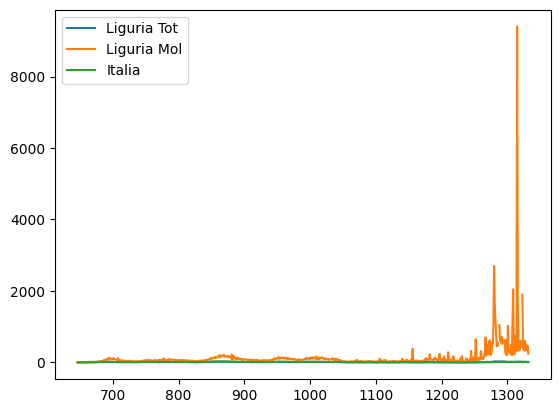

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(df_liguria["perc_positivi_tot"], label="Liguria Tot")
plt.plot(df_liguria["perc_positivi_mol"], label="Liguria Mol")
plt.plot(df_italia["perc_positivi"], label="Italia")

# df_liguria["perc_positivi_mol"].plot() 
# df_italia["perc_positivi"].plot() 

plt.legend(loc='upper left')
